https://dacon.io/competitions/official/235838/codeshare/3726?page=1&dtype=recent

In [29]:
import os
import cv2
import ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable
from PIL import Image

import torch
import torchvision
import torch.nn.functional as F
from torchvision.transforms import functional
from torch import Tensor, nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid

import albumentations as A
from albumentations.pytorch import ToTensorV2
from efficientnet_pytorch import EfficientNet
from torchinfo import summary

In [30]:
print(f'cv2: {cv2.__version__}, torch: {torch.__version__}, torchvision: {torchvision.__version__}, ipwidges: {ipywidgets.__version__}')

cv2: 4.5.2, torch: 1.8.0, torchvision: 0.10.0, ipwidges: 7.6.3


In [31]:
class MnistDataset(Dataset):
    def __init__(
        self,
        mode: str,
        input_path: os.PathLike,
        labels_filename: os.PathLike,
        transforms: Callable = None
    ) -> None:
        self.mode = mode
        self.input_path = input_path
        self.df = pd.read_csv(os.path.join(input_path, labels_filename))
        self.transforms = transforms
    
    def __len__(self):
        return self.df.shape[0]
    
    def __getitem__(self, index):
        filename = self.df.loc[index, 'file_name']
        image = Image.open(os.path.join(self.input_path, filename)).convert('RGB')
        image = np.array(image)
        
        if self.transforms is not None:
            image = self.transforms(image=image)['image']
            
        if self.mode == 'train':
            label = self.df.loc[index, 'label']
            label = torch.tensor(label, dtype=torch.int64)
            return image, label
        
        return image

In [32]:
train_transforms = A.Compose([
    A.Normalize(),
    ToTensorV2()
])

In [33]:
test_transforms = A.Compose([
    A.Normalize(),
    ToTensorV2()
])

In [34]:
trainset = MnistDataset('train', 'handwriting_dataset/train/', 'train_data.csv', train_transforms)

In [35]:
testset = MnistDataset('test', 'handwriting_dataset/test/', 'test_data.csv', test_transforms)

In [36]:
train_loader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=0)
test_loader = DataLoader(testset, batch_size=32, num_workers=0)

In [37]:
def show(images):
    if not isinstance(images, list):
        images = [images]

    fix, axes = plt.subplots(ncols=len(images), squeeze=False)
    for i, image in enumerate(images):
        image = image.detach()
        image = functional.to_pil_image(image).convert('L')
        axes[0, i].imshow(np.asarray(image), cmap='gray')
        axes[0, i].axis('off')   

/Users/sol/miniforge3/envs/m1/lib/python3.8/site-packages/albumentations/augmentations/functional.py:138: RuntimeWarning: divide by zero encountered in reciprocal
  denominator = np.reciprocal(std, dtype=np.float32)


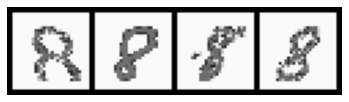

In [38]:
show(make_grid([trainset[i][0] for i in range(4)]))